In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py

In [ ]:
drive.mount('/content/drive')
!ls -R "/content/drive/My Drive/data_science_final_project/"

Mounted at /content/drive
'/content/drive/My Drive/data_science_final_project/':
credit_risk_dataset.csv


In [ ]:
# Replace the path with your CSV file path
file_path = '/content/drive/My Drive/data_science_final_project/credit_risk_dataset.csv'

# Read the CSV file
credit_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(credit_df.head())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [ ]:
# check the data size
credit_df.shape

(32581, 12)

In [ ]:
# numerical variables
num_cols = pd.DataFrame(credit_df[credit_df.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

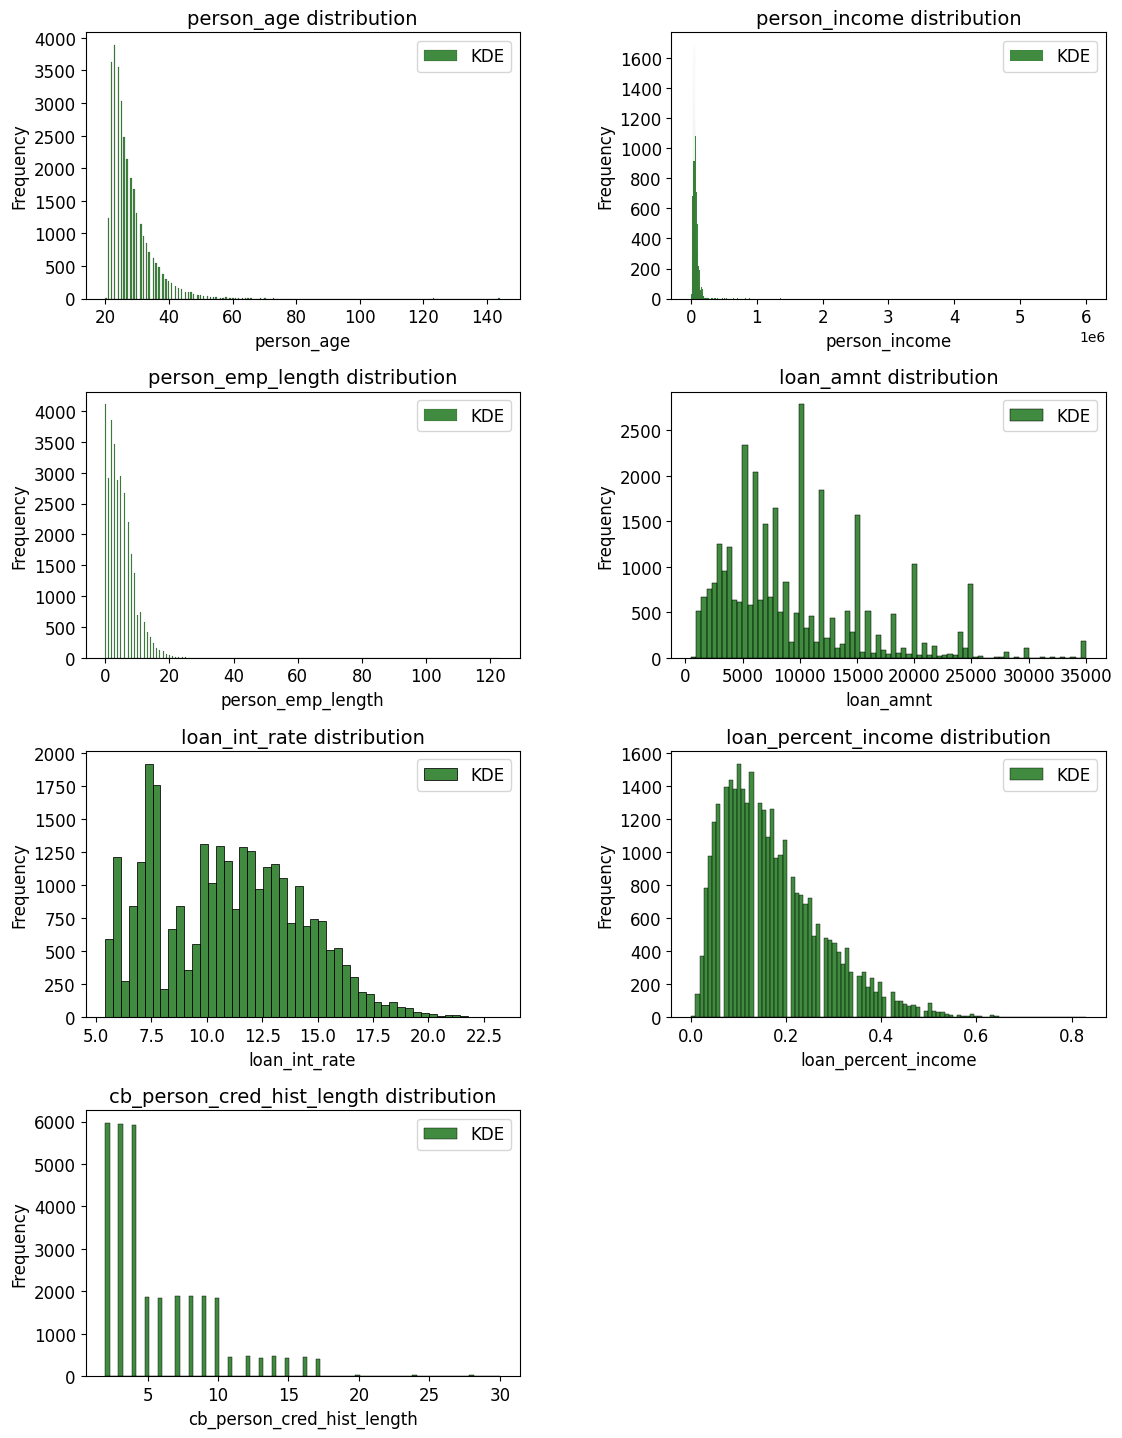

In [ ]:
# drop the label column 'loan status' before visualization
num_cols_hist = num_cols.drop(['loan_status'], axis=1)
# visualize the distribution for each variable
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.histplot(num_cols_hist[col], color='darkgreen',
                 kde_kws={'color': 'forest green', 'lw': 2, 'label': 'KDE'}) # KDE: the kernel density estimate
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Frequency', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

In [ ]:
credit_df_good = credit_df[credit_df["loan_status"] == 0]
credit_df_bad = credit_df[credit_df["loan_status"] == 1]

trace0 = go.Box(
    y=credit_df_good["loan_amnt"],
    x=credit_df_good["person_home_ownership"],
    name='Default',
    marker=dict(
        color='LightSkyBlue'
    )
)

trace1 = go.Box(
    y=credit_df_bad['loan_amnt'],
    x=credit_df_bad['person_home_ownership'],
    name='No Default',
    marker=dict(
        color='red'
    )
)

data = [trace0, trace1]

layout = go.Layout(
    yaxis=dict(
        title='Loan Amount',
        zeroline=False
    ),
    xaxis=dict(
        title='person_home_ownership'
    ),
    boxmode='group'
)
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='person_home_ownership')

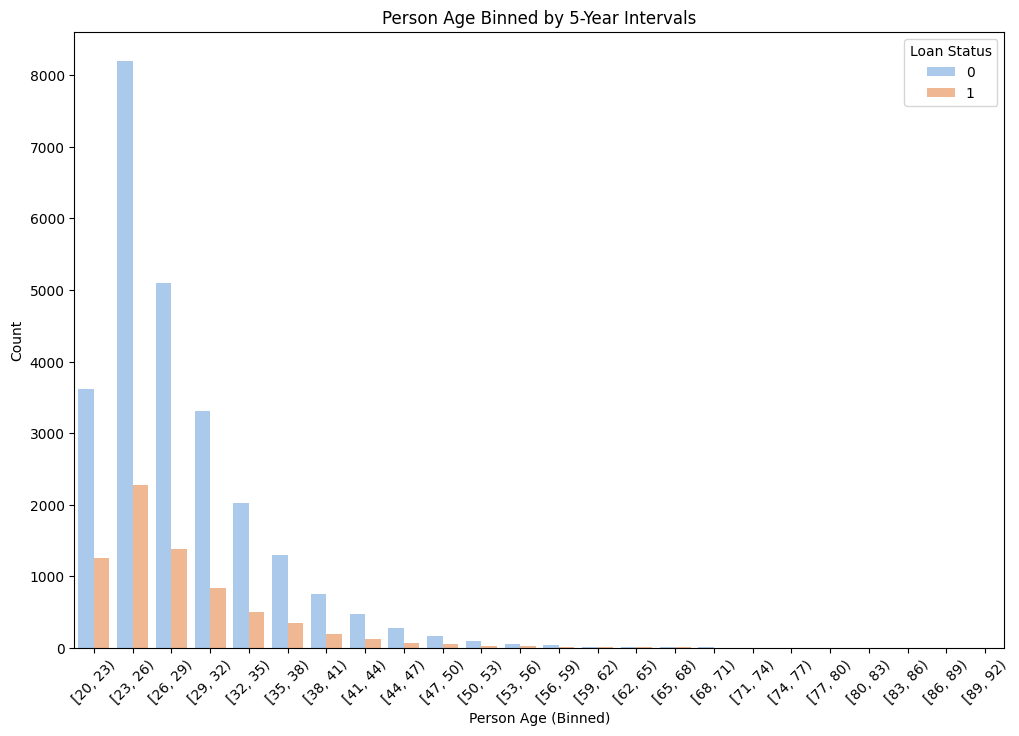

In [ ]:
# Bin the data
credit_df['age_bin'] = pd.cut(credit_df['person_age'], bins=range(20, credit_df['person_age'].max() - 50, 3), right=False)

# Plot
plt.figure(figsize=(12, 8))
sns.countplot(x='age_bin', data=credit_df, palette='pastel', hue='loan_status')
plt.xticks(rotation=45)
plt.title('Person Age Binned by 5-Year Intervals')
plt.xlabel('Person Age (Binned)')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right', bbox_to_anchor=(1, 1))
plt.show()